## *Лабораторная работа № 1*
### *«Проверка гипотезы о законе распределения генеральной совокупности»*
В результате опыта была получена выборочная совокупность.

Задание:
z

#### Вариант 14
18,5; 19,0; 20,6; 18,4; 18,3; 19,2 18,5; 20,3; 18,6; 20,6; 18,5; 18,3; 19,1; 21,0; 18,6; 19,1; 18,4; 19,9; 18,7; 19,5; 18,4; 21,6; 18,9; 19,5; 20,1; 19,4; 19,0; 19,2; 19,7; 19,9; 19,5; 20,0; 18,4; 18,3; 19,6; 18,8; 23,1; 19,6; 18,5; 20,7; 18,7; 18,7; 22,8; 18,9; 20,2; 19,0; 19,2; 19,6; 18,9; 20,3; 21,0; 18,9; 20,3; 18,3; 19,5; 18,5;18,5; 18,6; 19,3; 18,6.

In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from collections import Counter
from scipy import stats

In [ ]:
data = [18.5, 19.0, 20.6, 18.4, 18.3, 19.2, 18.5, 20.3, 18.6, 20.6, 18.5, 18.3, 19.1, 21.0, 18.6, 19.1, 18.4, 19.9, 18.7, 19.5, 18.4, 21.6, 18.9, 19.5, 20.1, 19.4, 19.0, 19.2, 19.7, 19.9, 19.5, 20.0, 18.4, 18.3, 19.6, 18.8, 23.1, 19.6, 18.5, 20.7, 18.7, 18.7, 22.8, 18.9, 20.2, 19.0, 19.2, 19.6, 18.9, 20.3, 21.0, 18.9, 20.3, 18.3, 19.5, 18.5, 18.5, 18.6, 19.3, 18.6]
print(f"Начальная выборка: {data}")

Начальная выборка: [18.5, 19.0, 20.6, 18.4, 18.3, 19.2, 18.5, 20.3, 18.6, 20.6, 18.5, 18.3, 19.1, 21.0, 18.6, 19.1, 18.4, 19.9, 18.7, 19.5, 18.4, 21.6, 18.9, 19.5, 20.1, 19.4, 19.0, 19.2, 19.7, 19.9, 19.5, 20.0, 18.4, 18.3, 19.6, 18.8, 23.1, 19.6, 18.5, 20.7, 18.7, 18.7, 22.8, 18.9, 20.2, 19.0, 19.2, 19.6, 18.9, 20.3, 21.0, 18.9, 20.3, 18.3, 19.5, 18.5, 18.5, 18.6, 19.3, 18.6]


# 1. Составить вариационный ряд

In [308]:
variation_series = sorted(data)
print(f"Вариационный ряд: {variation_series}")

Вариационный ряд: [18.3, 18.3, 18.3, 18.3, 18.4, 18.4, 18.4, 18.4, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.6, 18.6, 18.6, 18.6, 18.7, 18.7, 18.7, 18.8, 18.9, 18.9, 18.9, 18.9, 19.0, 19.0, 19.0, 19.1, 19.1, 19.2, 19.2, 19.2, 19.3, 19.4, 19.5, 19.5, 19.5, 19.5, 19.6, 19.6, 19.6, 19.7, 19.9, 19.9, 20.0, 20.1, 20.2, 20.3, 20.3, 20.3, 20.6, 20.6, 20.7, 21.0, 21.0, 21.6, 22.8, 23.1]


# 2. Построить интервальный статистический ряд.

In [309]:
n = len(data)
print(f"Объём выборки n = {n}")

Объём выборки n = 60


In [310]:
x_min = min(data)
x_max = max(data)
R = x_max - x_min
R = round(R, 3)
print(x_min)
print(x_max)
print(f"Размах выборки R = {R}")

18.3
23.1
Размах выборки R = 4.8


In [311]:
m = 1 + 3.322 * math.log10(n)
m = math.ceil(m)
print(f"Число интервалов m = {m}")

Число интервалов m = 7


In [312]:
h = R / m
h = math.ceil(h)
print(f"Длина частичного интервала h = {h}")

Длина частичного интервала h = 1


In [313]:
x0 = x_min - h / 2
print(f"Начало первого интервала x0 = {x0}")

Начало первого интервала x0 = 17.8


In [314]:
intervals = [x0 + i * h for i in range(m + 1)]
interval_counts = [0] * m

for value in data:
    for i in range(m):
        if intervals[i] <= value < intervals[i + 1]:
            interval_counts[i] += 1
            break

interval_table = pd.DataFrame({
    'Интервал': [f"[{intervals[i]:.2f}, {intervals[i + 1]:.2f})" for i in range(m)],
    'ni': interval_counts,
    'ni/n': [count / n for count in interval_counts],
    'ni/(n*h)': [count / (n * h) for count in interval_counts]
})

print("Интервальный статистический ряд:")
print(interval_table)

Интервальный статистический ряд:
         Интервал  ni      ni/n  ni/(n*h)
0  [17.80, 18.80)  21  0.350000  0.350000
1  [18.80, 19.80)  23  0.383333  0.383333
2  [19.80, 20.80)  11  0.183333  0.183333
3  [20.80, 21.80)   3  0.050000  0.050000
4  [21.80, 22.80)   0  0.000000  0.000000
5  [22.80, 23.80)   2  0.033333  0.033333
6  [23.80, 24.80)   0  0.000000  0.000000


# 3. По сгруппированным данным построить полигон относительных частот, гистограмму относительных частот

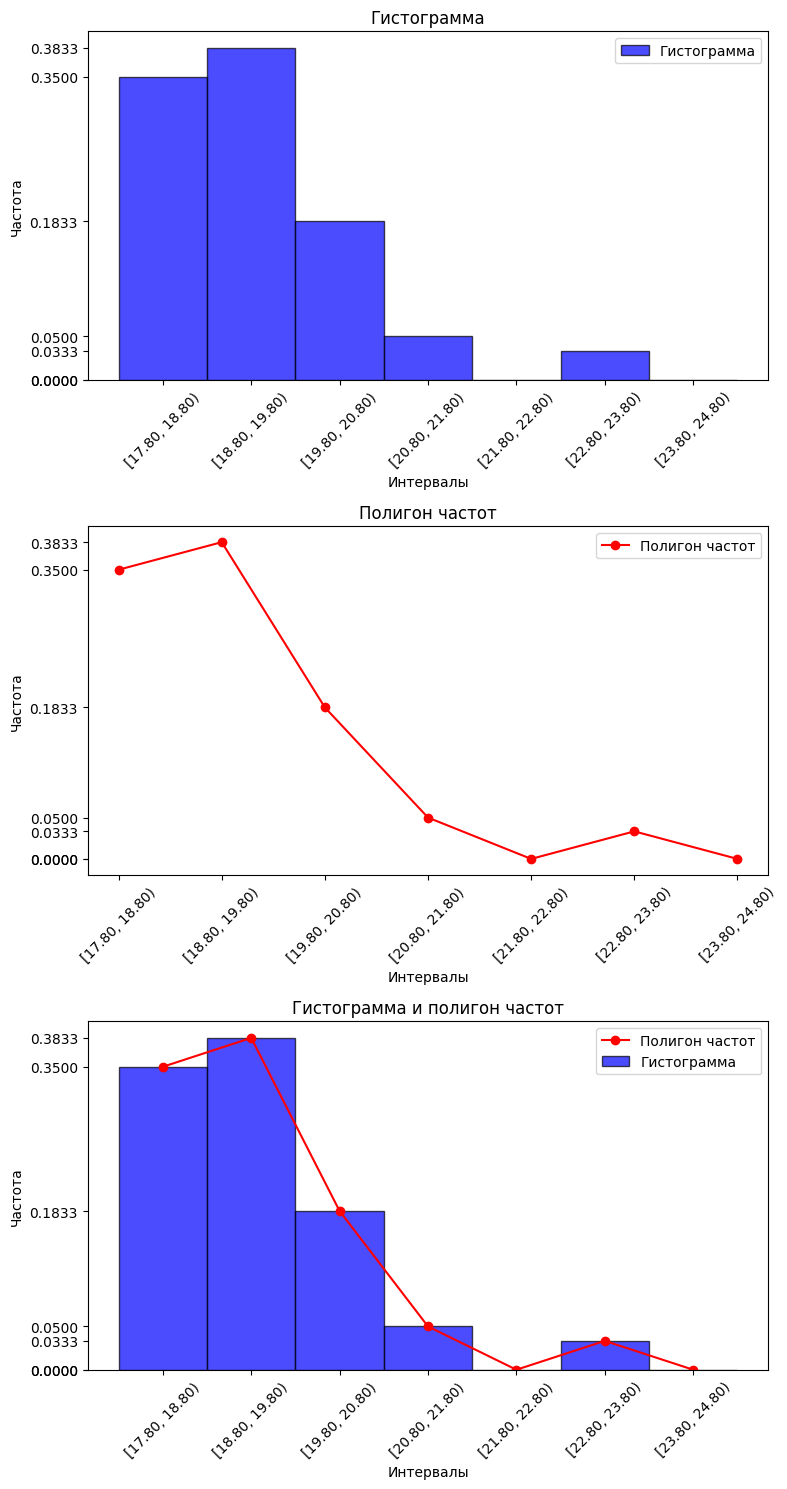

In [315]:
midpoints = [(intervals[i] + intervals[i + 1]) / 2 for i in range(m)]

fig, axes = plt.subplots(3, 1, figsize=(8, 15))

axes[0].bar(
    midpoints,
    interval_table['ni/(n*h)'],
    width=h,
    edgecolor='black',
    alpha=0.7,
    color='blue',
    label='Гистограмма'
    
)
axes[0].set_xticks(midpoints)
axes[0].set_xticklabels([f"[{intervals[i]:.2f}, {intervals[i + 1]:.2f})" for i in range(m)], rotation=45)
axes[0].set_yticks(interval_table['ni/(n*h)'])
axes[0].set_xlabel('Интервалы')
axes[0].set_ylabel('Частота')
axes[0].set_title('Гистограмма')
axes[0].legend()

axes[1].plot(
    midpoints,
    interval_table['ni/(n*h)'],
    marker='o',
    linestyle='-',
    color='red',
    label='Полигон частот'
)
axes[1].set_xticks(midpoints)
axes[1].set_xticklabels([f"[{intervals[i]:.2f}, {intervals[i + 1]:.2f})" for i in range(m)], rotation=45)
axes[1].set_yticks(interval_table['ni/(n*h)'])
axes[1].set_xlabel('Интервалы')
axes[1].set_ylabel('Частота')
axes[1].set_title('Полигон частот')
axes[1].legend()

axes[2].bar(
    midpoints,
    interval_table['ni/(n*h)'],
    width=h,
    edgecolor='black',
    alpha=0.7,
    color='blue',
    label='Гистограмма'
)
axes[2].plot(
    midpoints,
    interval_table['ni/(n*h)'],
    marker='o',
    linestyle='-',
    color='red',
    label='Полигон частот'
)
axes[2].set_xticks(midpoints)
axes[2].set_xticklabels([f"[{intervals[i]:.2f}, {intervals[i + 1]:.2f})" for i in range(m)], rotation=45)
axes[2].set_yticks(interval_table['ni/(n*h)'])
axes[2].set_xlabel('Интервалы')
axes[2].set_ylabel('Частота')
axes[2].set_title('Гистограмма и полигон частот')
axes[2].legend()

plt.tight_layout()

plt.show()

# 4. Построить график эмпирической функции распределения

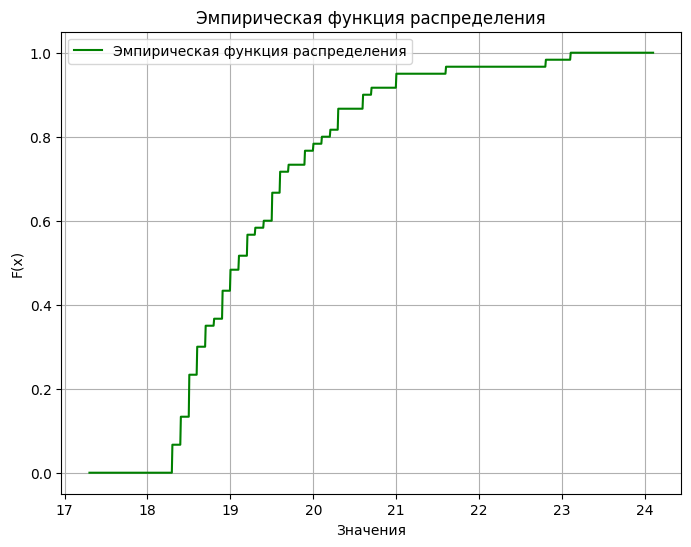

In [316]:
def empirical_distribution_function(x, data):
    return np.sum(np.array(data) <= x) / len(data)

x_values = np.linspace(x_min - 1, x_max + 1, 1000)
y_values = [empirical_distribution_function(x, variation_series) for x in x_values]

plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='Эмпирическая функция распределения', color='green')
plt.xlabel('Значения')
plt.ylabel('F(x)')
plt.title('Эмпирическая функция распределения')
plt.legend()
plt.grid(True)
plt.show()

# 5. Найти числовые характеристики выборки: выборочное среднее, исправленную выборочную дисперсию, моду, медиану, эксцесс, асимметрию.

In [ ]:
sample_mean = sum(data)/len(data)
sample_variance = sum((x - sample_mean) ** 2 for x in data) / (n - 1)
mode, mode_count = Counter(data).most_common(1)[0]
if n % 2 == 0:
    median = (variation_series[n//2 - 1] + variation_series[n//2]) / 2
else:
    median = variation_series[n//2]
print(f"4. Медиана: {median:.4f}")
skewness = pd.Series(data).skew()
kurtosis = pd.Series(data).kurtosis()

print(f"Выборочное среднее: {sample_mean}")
print(f"Исправленная выборочная дисперсия: {sample_variance}")
print(f"Мода: {mode}, встречается {mode_count} раз")
print(f"Медиана: {median}")
print(f"Асимметрия: {skewness}")
print(f"Эксцесс: {kurtosis}")

4. Медиана: 19.1000
Выборочное среднее: 19.384999999999998
Исправленная выборочная дисперсия: 1.090110169491526
Мода: 18.5, встречается 6 раз
Медиана: 19.1
Асимметрия: 1.5889700534694757
Эксцесс: 3.002546967684062


# Тимур, на счёт дальнейшей части я не уверен, смотри там по аккуратнее

# 6. По виду гистограммы и эмпирической функции распределения выборки выдвинуть гипотезу о распределении генеральной совокупности.
На основе анализа гистограммы и эмпирической функции распределения предполагаем, что генеральная совокупность имеет смещенное нормальное распределение с отрицательной асимметрией (левостороннее). Это подтверждается убывающими частотами в гистограмме и резким ростом ЭФР в области малых значений.

# 7. Найти оценки параметров предполагаемого распределения генеральной совокупности.

In [318]:
mu_hat = sample_mean
sigma_hat = np.sqrt(sample_variance)

print(f"Оценка математического ожидания μ̂ = {mu_hat}")
print(f"Оценка среднеквадратического отклонения σ̂ = {sigma_hat}")

Оценка математического ожидания μ̂ = 19.384999999999998
Оценка среднеквадратического отклонения σ̂ = 1.044083411175336


# 8 Построить на чертеже гистограммы и эмпирической функции её теоретические аналоги f(x) и F(x).


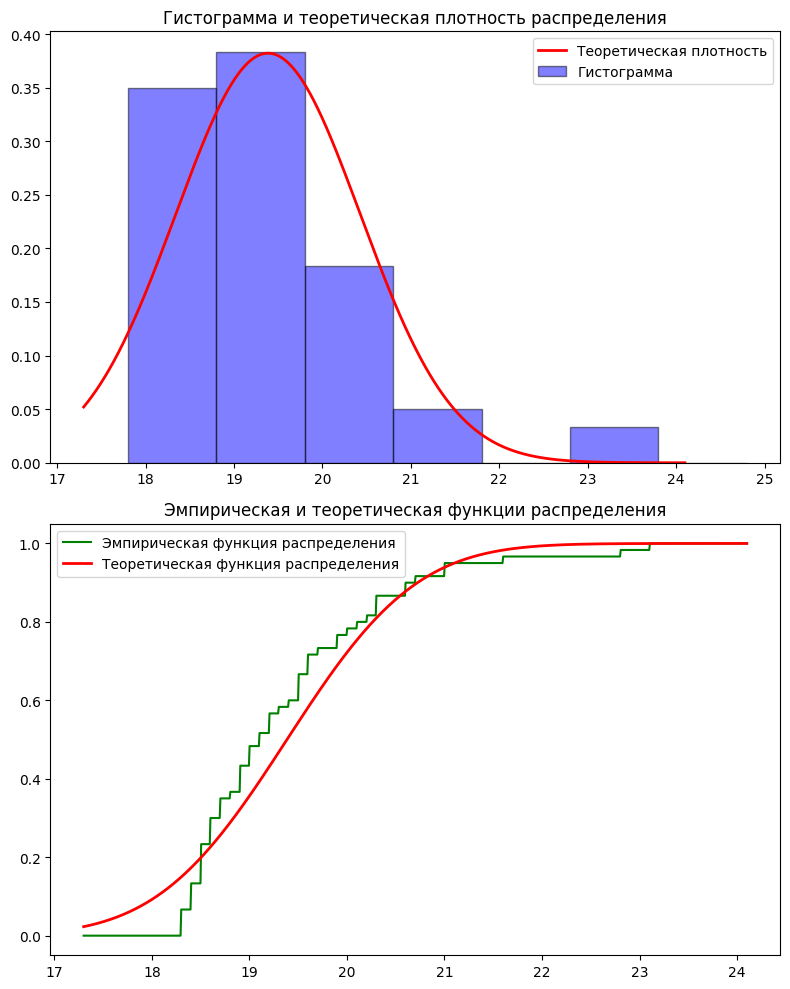

In [319]:
from scipy.stats import norm

# Теоретическая плотность распределения
x_theor = np.linspace(x_min - 1, x_max + 1, 1000)
pdf_theor = norm.pdf(x_theor, mu_hat, sigma_hat)

# Теоретическая функция распределения
cdf_theor = norm.cdf(x_theor, mu_hat, sigma_hat)

# Построение графиков
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# Гистограмма и теоретическая плотность
axes[0].bar(
    midpoints,
    interval_table['ni/(n*h)'],
    width=h,
    edgecolor='black',
    alpha=0.5,
    color='blue',
    label='Гистограмма'
)
axes[0].plot(
    x_theor,
    pdf_theor,
    color='red',
    linewidth=2,
    label='Теоретическая плотность'
)
axes[0].set_title('Гистограмма и теоретическая плотность распределения')
axes[0].legend()

# Эмпирическая и теоретическая функции распределения
axes[1].plot(
    x_values,
    y_values,
    color='green',
    label='Эмпирическая функция распределения'
)
axes[1].plot(
    x_theor,
    cdf_theor,
    color='red',
    linewidth=2,
    label='Теоретическая функция распределения'
)
axes[1].set_title('Эмпирическая и теоретическая функции распределения')
axes[1].legend()

plt.tight_layout()
plt.show()

# 9 Проверить выполнение правила «трех сигма».

In [320]:
within_3sigma = np.sum((data >= mu_hat - 3*sigma_hat) & (data <= mu_hat + 3*sigma_hat)) / len(data)
print(f"Доля данных в пределах 3 сигма: {within_3sigma:.4f}")

Доля данных в пределах 3 сигма: 0.9667


# 10 Применить критерий согласия Пирсона принять или опровергнуть выдвинутую гипотезу о распределении генеральной совокупности.

# 11 Найти доверительные интервалы для генеральной средней и генерального среднеквадратического отклонения по уровню надежности γ = 0,95.